# Import Library

In [1]:
import zipfile
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount("/content/drive")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading The Images

In [5]:
path = "/content/drive/MyDrive/OpenCV/Datasets/homer_bart_2.zip"
zip_object = zipfile.ZipFile(file = path , mode = "r")
zip_object.extractall("./")
zip_object.close()

# Train And Test Set

In [6]:
training_generator = ImageDataGenerator(rescale = 1. / 255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2)

train_dataset = training_generator.flow_from_directory("/content/homer_bart_2/training_set",
                                                       target_size = (64,64),
                                                       batch_size = 8, 
                                                       class_mode = "categorical",
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [7]:
test_generator = ImageDataGenerator(rescale = 1. / 255)

# Batch_size Önemli bak burda 1 seçtik çünkü sonuç istiyoruz !!!!
# Shuffle = False

test_dataset = test_generator.flow_from_directory("/content/homer_bart_2/test_set",
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = "categorical",
                                                  shuffle = False)

Found 54 images belonging to 2 classes.


In [16]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

# Building and training the neural network

In [ ]:
64 * 64

In [2]:
(6272 + 2) / 2

3137.0

In [3]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu", input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 577, activation = "relu"))
model.add(Dense(units = 577, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [8]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = model.fit_generator(train_dataset,epochs = 50, validation_data=test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
27/27 [==============================] - 3s 86ms/step - loss: 0.6876 - accuracy: 0.5814 - val_loss: 0.6345 - val_accuracy: 0.5370
Epoch 2/50
27/27 [==============================] - 2s 85ms/step - loss: 0.5550 - accuracy: 0.7116 - val_loss: 0.4956 - val_accuracy: 0.7778
Epoch 3/50
27/27 [==============================] - 3s 110ms/step - loss: 0.4816 - accuracy: 0.8000 - val_loss: 0.4012 - val_accuracy: 0.8889
Epoch 4/50
27/27 [==============================] - 3s 108ms/step - loss: 0.4079 - accuracy: 0.8140 - val_loss: 0.9179 - val_accuracy: 0.5370
Epoch 5/50
27/27 [==============================] - 4s 150ms/step - loss: 0.3929 - accuracy: 0.8047 - val_loss: 0.3747 - val_accuracy: 0.8333
Epoch 6/50
27/27 [==============================] - 4s 136ms/step - loss: 0.3887 - accuracy: 0.8326 - val_loss: 0.2578 - val_accuracy: 0.8704
Epoch 7/50
27/27 [==============================] - 4s 140ms/step - loss: 0.3774 - accuracy: 0.8558 - val_loss: 0.2161 - val_accuracy: 0.8889
Epoch 8/

In [18]:
def history_graph(history, epochs):

    plt.figure(figsize = (10,6))

    plt.subplot(121)
    plt.plot(history.history["accuracy"],label = "Train")
    plt.plot(history.history["val_accuracy"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Accuracy Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.subplot(122)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Loss Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.tight_layout()
    plt.show()

def confusion_graph(y_true,y_pred):

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (10,5))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, linewidth = 0.4, linecolor="white", annot_kws = {"size" : 20})
    plt.ylabel("Actual",fontsize = 15)
    plt.xlabel("Predicted",fontsize = 15)
    plt.title("Confusion Matrix Graph", fontsize = 15)
    plt.show()

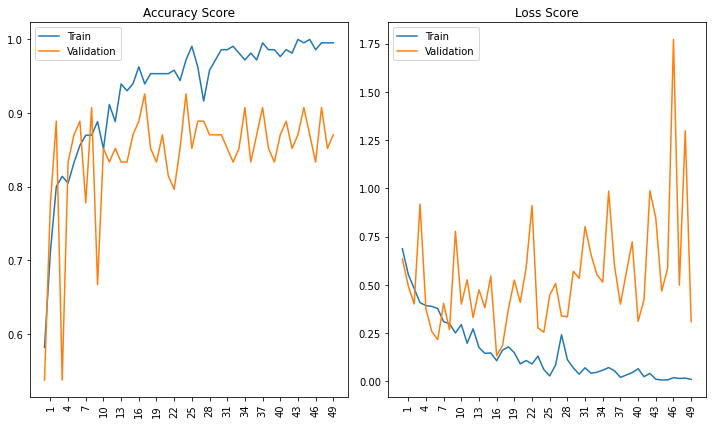

In [10]:
history_graph(history, 50)

# Evaluating The Neural Network

In [11]:
model.evaluate(test_dataset)

54/54 [==============================] - 0s 7ms/step - loss: 0.3095 - accuracy: 0.8704


[0.30948424339294434, 0.8703703880310059]

In [12]:
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [16]:
test_dataset.classes, test_dataset.class_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), {'bart': 0, 'homer': 1})

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

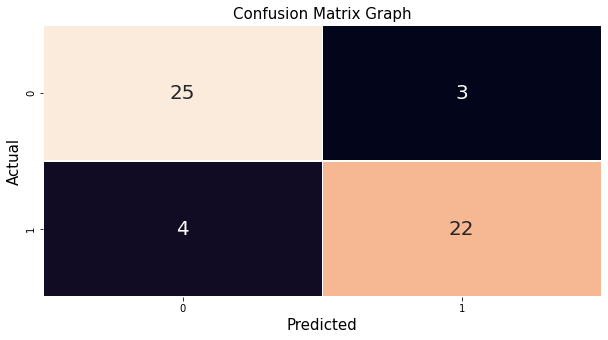

In [21]:
confusion_graph(test_dataset.classes, y_pred)

In [22]:
print(classification_report(test_dataset.classes, y_pred))
print()
print("Accuracy : {}".format(accuracy_score(test_dataset.classes, y_pred)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.88      0.85      0.86        26

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54


Accuracy : 0.8703703703703703


# Saving And Loading The Model

In [23]:
model_json = model.to_json()

with open("model.json","w") as json_file:
    json_file.write(model_json)
json_file.closed

True

In [24]:
save_model(model, "model.h5")

In [25]:
with open("model.json","r") as file:
    model_read = file.read()
file.closed

True

In [26]:
model_read

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [27]:
# Şu kısım Çok önemli sadece 
# load_model = model_from_json(model_json) yapmak yeterli değil unutma !!!!

model_load = tf.keras.models.model_from_json(model_read)
model_load.load_weights("model.h5")
model_load.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

# Classifying One Single Image

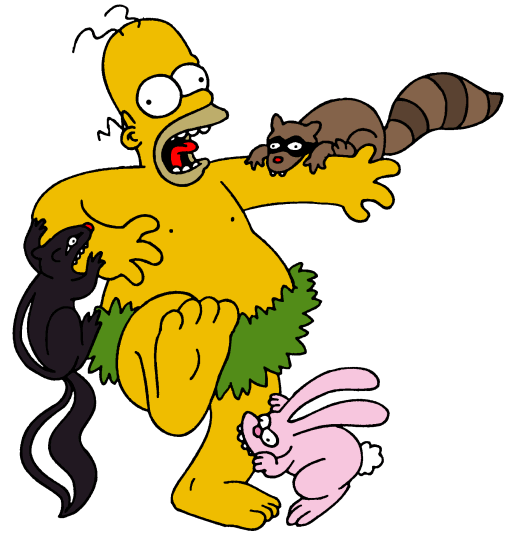

In [37]:
test_path = "/content/homer_bart_2/test_set/homer/homer15.bmp"
test_image = cv2.imread(test_path)
cv2_imshow(test_image)

In [38]:
test_image = cv2.resize(test_image, (64,64))
test_image = test_image / 255
test_image.shape

(64, 64, 3)

In [39]:
test_image = test_image.reshape((1,64,64,3))
test_image.shape

(1, 64, 64, 3)

In [40]:
results = model_load.predict(test_image)
results = np.argmax(results)
results

1

In [51]:
test_path = "/content/homer_bart_2/test_set/homer/homer8.bmp" 
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image, (64,64))
test_image = test_image / 255
test_image = test_image.reshape((1,64,64,3))
results = model_load.predict(test_image)
results = np.argmax(results)

if results == 0:
    print("Bart")
else:
    print("Homer")

Homer


----

# HomeWork

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

tf.__version__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'2.7.0'

In [53]:
path = '/content/drive/MyDrive/OpenCV/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

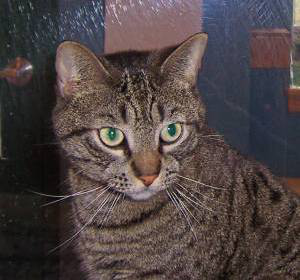

In [54]:
tf.keras.preprocessing.image.load_img('/content/cat_dog_2/training_set/cat/cat.1.jpg')

In [55]:
training_generator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2)

train_dataset = training_generator.flow_from_directory("/content/cat_dog_2/training_set",
                                                        target_size = (64,64),
                                                        batch_size=32,
                                                        class_mode = "categorical",
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [56]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_dataset = test_generator.flow_from_directory("/content/cat_dog_2/test_set",
                                                  target_size = (64,64),
                                                   batch_size = 1,
                                                   shuffle = False,
                                                   class_mode = "categorical")

Found 1000 images belonging to 2 classes.


In [57]:
train_dataset.classes,train_dataset.class_indices

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32), {'cat': 0, 'dog': 1})

In [58]:
test_dataset.classes,test_dataset.class_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [59]:
hom_model = Sequential()

hom_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu" , input_shape = (64,64,3)))
hom_model.add(MaxPool2D(pool_size = (2,2)))

hom_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
hom_model.add(MaxPool2D(pool_size = (2,2)))

hom_model.add(Flatten())
hom_model.add(Dense(units = 3137, activation = "relu"))
hom_model.add(Dense(units = 3137, activation = "relu"))
hom_model.add(Dense(units = 2, activation = "softmax"))

hom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 3137)             

In [60]:
hom_model.compile(optimizer = "adam",loss = "categorical_crossentropy", metrics = ["accuracy"])
hom_history = hom_model.fit_generator(train_dataset, epochs = 10, validation_data = test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
125/125 [==============================] - 98s 771ms/step - loss: 0.8085 - accuracy: 0.5452 - val_loss: 0.6692 - val_accuracy: 0.5770
Epoch 2/10
125/125 [==============================] - 82s 654ms/step - loss: 0.6720 - accuracy: 0.5830 - val_loss: 0.6768 - val_accuracy: 0.5580
Epoch 3/10
125/125 [==============================] - 81s 646ms/step - loss: 0.6531 - accuracy: 0.6277 - val_loss: 0.6568 - val_accuracy: 0.6020
Epoch 4/10
125/125 [==============================] - 81s 650ms/step - loss: 0.6418 - accuracy: 0.6330 - val_loss: 0.6387 - val_accuracy: 0.6430
Epoch 5/10
125/125 [==============================] - 82s 656ms/step - loss: 0.6099 - accuracy: 0.6670 - val_loss: 0.6779 - val_accuracy: 0.5900
Epoch 6/10
125/125 [==============================] - 82s 658ms/step - loss: 0.5887 - accuracy: 0.6858 - val_loss: 0.6150 - val_accuracy: 0.6650
Epoch 7/10
125/125 [==============================] - 82s 655ms/step - loss: 0.5655 - accuracy: 0.7080 - val_loss: 0.6267 - val_ac

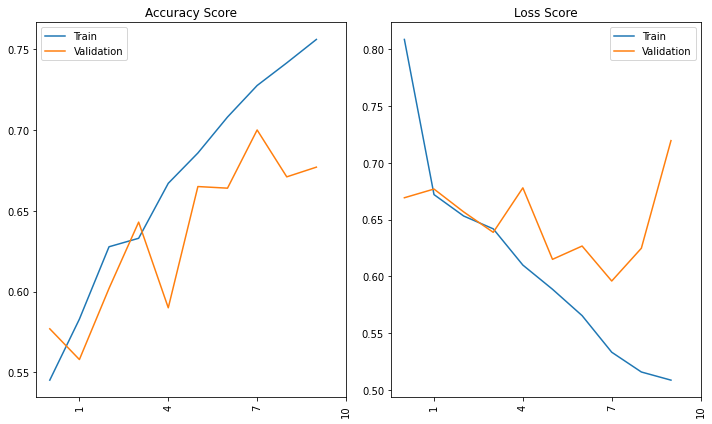

In [61]:
history_graph(hom_history,10)

In [62]:
hom_model.evaluate(test_dataset)

1000/1000 [==============================] - 18s 18ms/step - loss: 0.7195 - accuracy: 0.6770


[0.7194535136222839, 0.6769999861717224]

In [63]:
hom_y_pred = hom_model.predict(test_dataset)
hom_y_pred = np.argmax(hom_y_pred,axis = 1)
hom_y_pred[:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

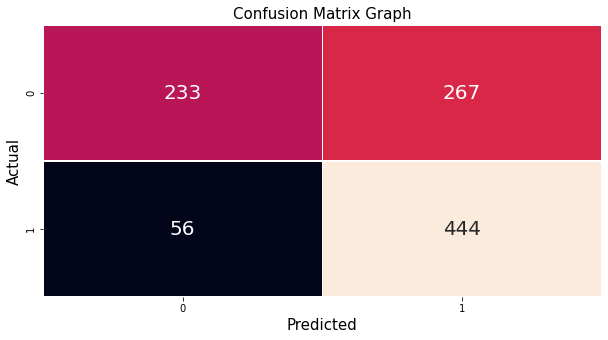

In [64]:
confusion_graph(test_dataset.classes, hom_y_pred)

In [65]:
print(classification_report(test_dataset.classes, hom_y_pred))
print()
print(accuracy_score(test_dataset.classes, hom_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.47      0.59       500
           1       0.62      0.89      0.73       500

    accuracy                           0.68      1000
   macro avg       0.72      0.68      0.66      1000
weighted avg       0.72      0.68      0.66      1000


0.677


In [66]:
hom_model_json = hom_model.to_json()
with open("hom_model.json","w") as json_file:
    json_file.write(hom_model_json)

In [67]:
save_model(hom_model,"/content/hom_model.h5")

In [68]:
with open("hom_model.json","r") as json_file:
    load_hom_model_json = json_file.read()
load_hom_model_json

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [71]:
load_hom_model = tf.keras.models.model_from_json(load_hom_model_json)

load_hom_model.load_weights("hom_model.h5")

load_hom_model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accurcay"])

load_hom_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 3137)             

In [72]:
test_path = "/content/cat_dog_2/test_set/cat/cat.3500.jpg"
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image,(64,64))
test_image = test_image / 255
test_image = test_image.reshape(-1,64,64,3)
results = load_hom_model.predict(test_image)
results = np.argmax(results)

if results == 0:
    print("Cat")
else:
    print("Dog")

Cat
